In [1]:
''' PRE-PROCESSING (INDIVIDUAL 1) '''
''' Michelangelo Rubino '''

# The function preproc_df(filename) at the end of this stage can be used to perform the following transformations:

# Step 1 - delete the features with no values
# Step 2 - delete the features with duplicated values 
# Step 3 - remove highly correlated features (kendall/spearman >= 0.9)
# Step 4 - standardize the features to give them a distribution closer to the normal one

import csv
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler

# uncomment to show every output rows
#pd.set_option('display.max_rows', 200) 

# uncomment to show every output columns
#pd.set_option('display.max_columns', 200) 

set_printoptions(precision=3) # how the floating numbers are shown

''' Load the data from the train dataset and create a dataframe '''

filename = 'train_imperson_without4n7_balanced_data.csv'

# use the code below to load the test dataset
# filename = 'test_imperson_without4n7_balanced_data.csv'

df = pd.read_csv(filename,
                header=0,
                na_values=['nan'])


In [2]:
''' View dataframe info '''

# the dataframe does not contain null values (it can be verified by using df.isnull().sum())
# 97,044 rows, 153 columns
# the class is the feature 155
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97044 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 113.3 MB
None


In [3]:
''' The observations are perfectly balanced: 50% class 0, 50% class 1 '''
class_counts = df.groupby('155').size()
print(class_counts)

155
0    48522
1    48522
dtype: int64


In [4]:
''' Check the first 10 rows '''
df.head(10)

,1,2,3,5,6,8,9,10,11,12,...,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
5,0,0,0,0.005099,0.005099,0.094771,0.094771,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
6,0,0,0,0.020133,0.020133,0.073203,0.073203,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
7,0,0,0,0.140800,0.140800,0.144440,0.144440,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
8,0,0,0,0.004916,0.004916,0.094771,0.094771,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
9,0,0,0,0.034137,0.034137,0.070588,0.070588,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0


In [5]:
''' Descriptive statistics '''
print(df.describe())

             1        2        3             5             6             8  \
count  97044.0  97044.0  97044.0  97044.000000  97044.000000  97044.000000   
mean       0.0      0.0      0.0      0.006252      0.006252      0.193837   
std        0.0      0.0      0.0      0.015541      0.015541      0.354444   
min        0.0      0.0      0.0      0.000003      0.000003      0.000000   
25%        0.0      0.0      0.0      0.001442      0.001442      0.037908   
50%        0.0      0.0      0.0      0.003706      0.003706      0.037908   
75%        0.0      0.0      0.0      0.005916      0.005916      0.054902   
max        0.0      0.0      0.0      0.978440      0.978440      1.000000   

                  9       10       11       12  ...           146      147  \
count  97044.000000  97044.0  97044.0  97044.0  ...  97044.000000  97044.0   
mean       0.193837      0.0      0.0      0.0  ...      0.028436      0.0   
std        0.354444      0.0      0.0      0.0  ...      0.0627

In [6]:
''' Step 1 - Delete columns with no values '''

columnsToDelete = [] 

# if the feature has std == 0 it means no values or only one value
for key, value in df.iteritems():
    if df[key].std() == 0:
        columnsToDelete.append(key)
        
df1 = df.drop(columnsToDelete, axis=1) # 74 features have been deleted

# the features are now 78 + 1 class
print(df1.columns.values)


['5' '6' '8' '9' '14' '15' '16' '18' '20' '26' '29' '38' '43' '47' '48'
 '50' '51' '52' '61' '62' '64' '66' '67' '68' '70' '71' '72' '73' '75'
 '76' '77' '78' '79' '80' '82' '83' '84' '86' '88' '89' '90' '93' '94'
 '97' '98' '104' '105' '106' '107' '108' '109' '110' '111' '112' '113'
 '117' '118' '119' '120' '121' '122' '123' '125' '126' '127' '128' '129'
 '130' '133' '138' '140' '141' '142' '143' '144' '145' '146' '154' '155']


In [7]:
''' Step 2 - Some features are duplicates of other features, then they can be removed keeping only the first column '''

# df has 14 duplicated features, then, after removing them, the new dataframe has 64 features + 1 class
df2 = df1.loc[:,~df1.T.duplicated(keep='first')]

# the features are now 64 + 1 class
print(df2.columns.values)


['5' '8' '14' '38' '47' '48' '50' '51' '61' '64' '66' '67' '68' '70' '71'
 '72' '73' '75' '76' '77' '78' '79' '80' '82' '83' '84' '86' '88' '90'
 '93' '94' '97' '98' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '117' '118' '119' '120' '121' '122' '123' '125' '126' '127' '128'
 '129' '130' '138' '140' '141' '142' '143' '144' '145' '154' '155']


In [8]:
''' Check the unique values for each feature '''

print(df2.nunique()) 


5       8718
8        399
14         2
38     25023
47        12
48        11
50         2
51         2
61        63
64        20
66         3
67        12
68         3
70         2
71         2
72         2
73         2
75        80
76       133
77        84
78        42
79        46
80        18
82      4096
83         2
84         2
86         2
88         4
90         2
93         2
       ...  
106        2
107     1738
108        2
109        4
110        3
111        2
112        4
113        2
117        6
118        2
119       34
120       14
121        2
122        3
123        2
125        3
126        2
127        3
128        3
129        2
130        2
138        2
140    17320
141        4
142    20359
143     1076
144       75
145        3
154      333
155        2
Length: 65, dtype: int64


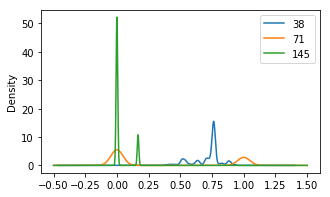

In [9]:
'''Plot the distribution for the 3 main groups:

    - features with continuous values between 0 and 1 (ex: 38)
    - features with only two values, 0 and 1 (ex: 71)
    - features with a few values (ex: 145) '''

# no feature with a perfect normal distribution
df2[["38", "71", "145"]].plot.kde(figsize=(5,3), sharex=False)
pyplot.show()


In [10]:
''' Step 3 - Create two correlation matrices (Kendall and Spearman) and remove highly correlated features (ie. >= 0.9 )'''

# Create correlation matrix with kendall method
corr_matrix_kendall = df2.corr(method='kendall').abs()

# Create a True/False mask and apply it
mask_kendall = np.triu(np.ones_like(corr_matrix_kendall, dtype=bool))
tri_df_kendall = corr_matrix_kendall.mask(mask_kendall)

# List column names of highly correlated features ( >= 0.90 )
kendall_to_drop = [c for c in tri_df_kendall.columns if any(tri_df_kendall[c] >= 0.90)]

# Create correlation matrix with spearman method
corr_matrix_spearman = df2.corr(method='spearman').abs()

# Create a True/False mask and apply it
mask_spearman = np.triu(np.ones_like(corr_matrix_spearman, dtype=bool))
tri_df_spearman = corr_matrix_spearman.mask(mask_spearman)

# List column names of highly correlated features ( >= 0.90 )
spearman_to_drop = [c for c in tri_df_spearman.columns if any(tri_df_spearman[c] >= 0.90)]

# The two methods show almost the same features, 19 are in common, 1 is not
drop_high_corr = []
for i in kendall_to_drop:
    if i in spearman_to_drop:
        drop_high_corr.append(i)

# drop the 19 common features with high correlation both with kendall and spearman       
df3 = df2.drop(drop_high_corr, axis=1)  

# print the common features removed from the dataframe
print(drop_high_corr)


['47', '50', '64', '66', '68', '84', '86', '90', '97', '98', '107', '108', '118', '119', '126', '127', '128', '129', '141']


In [11]:
''' After this step the dataframe has 45 features and 1 class '''

print(len(df3.columns.values))
print(df3.columns.values)

46
['5' '8' '14' '38' '48' '51' '61' '67' '70' '71' '72' '73' '75' '76' '77'
 '78' '79' '80' '82' '83' '88' '93' '94' '104' '105' '106' '109' '110'
 '111' '112' '113' '117' '120' '121' '122' '123' '125' '130' '138' '140'
 '142' '143' '144' '145' '154' '155']


In [12]:
''' Analysis and plotting of the dataframe df3 show that none of the features has a normal form '''

# Uncomment to see the plots

# skewness
#skew = df3.skew()
#print(skew)

# histogram plot
#df3.hist(layout=(9,9), figsize=(30,14))
#pyplot.show()

# density plot
#df3.plot(kind='density', subplots=True, layout=(9,9), sharex=False, figsize=(20,14))
#pyplot.show()

# Box and Whisker Plot
#df3.plot(kind='box', subplots=True, layout=(9,9), sharex=False, sharey=False, figsize=(20,14))
#pyplot.show()

# Scatterplot Matrix
# it takes a lot to run
#scatter_matrix(df3, figsize=[5, 5])
#pyplot.show()


' Analysis and plotting of the dataframe df3 show that none of the features has a normal form '

In [13]:
''' Step 4 - Standardize the features to give them a normal form: mean = 0, sd = 1 '''

# save the features name
features_names = df3.columns.values

# use the array lenght
df3_len = len(df3.columns.values) - 1

# extract the values from the dataframe
array = df3.values
X = array[:, 0:df3_len] # extract the features
Y = array[:, df3_len].astype(int) # extract the class

# fit and transform the values
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# a new dataframe is created with the standardized values
df4 = pd.DataFrame(rescaledX, columns=features_names[0:df3_len])

# add the class 155
df4.insert(df3_len, '155', Y, False)


In [14]:
''' Now we have a dataframe with standardized values '''

print(df4.head(5))


          5         8        14        38       48        51        61  \
0 -0.398089 -0.521063  0.014712 -3.142811  0.01475  1.534041  0.708991   
1 -0.401396 -0.546879  0.014712 -3.142628  0.01475  1.534041  0.708991   
2  1.883791 -0.347726  0.014712 -3.142264  0.01475 -0.651873 -0.254672   
3 -0.072373 -0.279498  0.014712 -3.141809  0.01475 -0.651873 -4.109153   
4  1.857280 -0.347726  0.014712 -3.141445  0.01475 -0.651873 -0.013756   

         67        70        71  ...       125       130      138       140  \
0 -0.175252 -0.285459  1.391247  ... -0.038843 -0.148360 -0.00321 -1.050047   
1  1.575793 -0.285459 -0.718780  ... -0.038843 -0.148360 -0.00321 -1.050047   
2  0.602982 -0.285459 -0.718780  ... -0.038843 -0.148360 -0.00321 -1.050047   
3  0.602982 -0.285459 -0.718780  ... -0.038843  6.740366 -0.00321 -1.050047   
4  0.602982 -0.285459 -0.718780  ... -0.038843 -0.148360 -0.00321 -1.050047   

        142       143      144       145       154  155  
0 -0.995985 -0.091603 

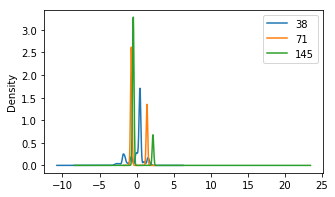

In [15]:
''' After standardizing, the features do not show a perfect bell-shaped distribution, but there
    is some improvement '''

df4[["38", "71", "145"]].plot.kde(figsize=(5,3), sharex=False )
pyplot.show()


In [16]:
''' This function performs the steps previously described '''

filename = 'train_imperson_without4n7_balanced_data.csv'

def preproc_df(filename):
    dataframe = pd.read_csv(filename, header=0, na_values=['nan'])
    
    # Step 1 - remove features with no values
    columnsToDelete = [] 
    for key, value in dataframe.iteritems():
        if dataframe[key].std() == 0:
            columnsToDelete.append(key)
        
    df1 = dataframe.drop(columnsToDelete, axis=1)
    
    # Step 2 - remove duplicated features, keeping only the first one 
    df2 = df1.loc[:,~df1.T.duplicated(keep='first')]
    
    # Step 3 - Compute correlation matrices and drop the features with high correlation 
    corr_matrix_kendall = df2.corr(method='kendall').abs()
    mask_kendall = np.triu(np.ones_like(corr_matrix_kendall, dtype=bool))
    tri_df_kendall = corr_matrix_kendall.mask(mask_kendall)
    kendall_to_drop = [c for c in tri_df_kendall.columns if any(tri_df_kendall[c] >= 0.90)]

    corr_matrix_spearman = df2.corr(method='spearman').abs()
    mask_spearman = np.triu(np.ones_like(corr_matrix_spearman, dtype=bool))
    tri_df_spearman = corr_matrix_spearman.mask(mask_spearman)
    spearman_to_drop = [c for c in tri_df_spearman.columns if any(tri_df_spearman[c] >= 0.90)]
    
    # list the features having high kendall and spearman correlation
    drop_high_corr = []
    for i in kendall_to_drop:
        if i in spearman_to_drop:
            drop_high_corr.append(i)

    # drop the common features       
    df3 = df2.drop(drop_high_corr, axis=1)  
    
    # Step 4 - Standardize the features
    features_names = df3.columns.values # save the feature names
    df3_len = len(df3.columns.values) - 1 # use the array length 

    # extract the values from the dataframe (features and class)
    array = df3.values
    X = array[:, 0:df3_len] 
    Y = array[:, df3_len].astype(int) 

    # fit and transform the values
    scaler = StandardScaler().fit(X)
    rescaledX = scaler.transform(X)

    # a new dataframe is created with the standardized values
    df4 = pd.DataFrame(rescaledX, columns=features_names[0:df3_len])

    # add the class 155
    df4.insert(df3_len, '155', Y, False)

    return df4


In [17]:
''' Before the Feature selection stage the train dataset has 45 features and 1 class

['5' '8' '14' '38' '48' '51' '61' '67' '70' '71' '72' '73' '75' '76' '77'
 '78' '79' '80' '82' '83' '88' '93' '94' '104' '105' '106' '109' '110'
 '111' '112' '113' '117' '120' '121' '122' '123' '125' '130' '138' '140'
 '142' '143' '144' '145' '154' '155']


while the test dataset has 43 features and 1 class

['5' '8' '14' '38' '47' '48' '51' '61' '64' '67' '70' '71' '72' '73' '75'
 '76' '77' '79' '80' '81' '82' '94' '104' '105' '106' '109' '110' '111'
 '112' '120' '121' '122' '123' '125' '128' '140' '141' '142' '143' '144'
 '145' '148' '154' '155']
 
'''


" Before the Feature selection stage the train dataset has 45 features and 1 class\n\n['5' '8' '14' '38' '48' '51' '61' '67' '70' '71' '72' '73' '75' '76' '77'\n '78' '79' '80' '82' '83' '88' '93' '94' '104' '105' '106' '109' '110'\n '111' '112' '113' '117' '120' '121' '122' '123' '125' '130' '138' '140'\n '142' '143' '144' '145' '154' '155']\n\n\nwhile the test dataset has 43 features and 1 class\n\n['5' '8' '14' '38' '47' '48' '51' '61' '64' '67' '70' '71' '72' '73' '75'\n '76' '77' '79' '80' '81' '82' '94' '104' '105' '106' '109' '110' '111'\n '112' '120' '121' '122' '123' '125' '128' '140' '141' '142' '143' '144'\n '145' '148' '154' '155']\n \n"

In [18]:
''' Feature Selection (INDIVIDUAL 2) '''
''' Ian Dickerson '''
from sklearn.feature_selection import mutual_info_classif


In [19]:
processed_df = preproc_df("./train_imperson_without4n7_balanced_data.csv")
processed_df.head()

,5,8,14,38,48,51,61,67,70,71,...,125,130,138,140,142,143,144,145,154,155
0,-0.398089,-0.521063,0.014712,-3.142811,0.01475,1.534041,0.708991,-0.175252,-0.285459,1.391247,...,-0.038843,-0.148360,-0.00321,-1.050047,-0.995985,-0.091603,-0.02603,-0.453058,-0.495656,0
1,-0.401396,-0.546879,0.014712,-3.142628,0.01475,1.534041,0.708991,1.575793,-0.285459,-0.718780,...,-0.038843,-0.148360,-0.00321,-1.050047,-0.995985,-0.091603,-0.02603,-0.453058,-0.495656,0
2,1.883791,-0.347726,0.014712,-3.142264,0.01475,-0.651873,-0.254672,0.602982,-0.285459,-0.718780,...,-0.038843,-0.148360,-0.00321,-1.050047,-0.995985,-0.091603,-0.02603,-0.453058,-0.495656,0
3,-0.072373,-0.279498,0.014712,-3.141809,0.01475,-0.651873,-4.109153,0.602982,-0.285459,-0.718780,...,-0.038843,6.740366,-0.00321,-1.050047,-0.995985,-0.091603,-0.02603,-0.453058,-0.495656,0
4,1.857280,-0.347726,0.014712,-3.141445,0.01475,-0.651873,-0.013756,0.602982,-0.285459,-0.718780,...,-0.038843,-0.148360,-0.00321,-1.050047,-0.995985,-0.091603,-0.02603,-0.453058,-0.495656,0


### Filtering

Build a separate dataframe to track information about the features

In [20]:
features = pd.DataFrame(index = processed_df.columns[:-1])


In [21]:
features["MI"] = mutual_info_classif(processed_df.iloc[:,:-1],processed_df["155"])

In [22]:
features["absrho"] = [abs(processed_df[f].corr(processed_df["155"],method='pearson' )) for f in features.index]
features["abstau"] = [abs(processed_df[f].corr(processed_df["155"],method='kendall' )) for f in features.index]

Then the features with high MI, rho or tau can be identified with:

In [23]:
features.loc[(features.MI > 0.4)|(features.absrho > 0.4)|(features.abstau > 0.4)]

,MI,absrho,abstau
5,0.446103,0.058410,0.517106
8,0.635981,0.438183,0.119957
38,0.648695,0.496848,0.448580
51,0.275384,0.651828,0.651828
67,0.476068,0.838937,0.783199
71,0.319016,0.708561,0.708561
73,0.131529,0.477183,0.477183
75,0.274798,0.296245,0.620754
76,0.478523,0.099870,0.747373
77,0.488204,0.201783,0.289967


### PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=5)
pcaX = pca.fit_transform(processed_df.iloc[:,:-1])

Add the PCs to the processed dataframe

In [ ]:
processed_with_pcs = pd.DataFrame(pcaX,columns=[f"PC{i}" for i in range(1,6)]).join(processed_df)
processed_with_pcs.head()

## Feature selection function

In [ ]:
def get_df(filename, rho=0.4, tau=0.4, mi=0.4, pcs=5):
    
    # Preprocessing
    processed_data = preproc_df(filename)
    # Feature information tracking
    features = pd.DataFrame(index = processed_data.columns[:-1])
    features["MI"] = mutual_info_classif(processed_data.iloc[:,:-1],processed_data["155"])
    features["absrho"] = [abs(processed_data[f].corr(processed_data["155"],method='pearson' )) for f in features.index]
    features["abstau"] = [abs(processed_data[f].corr(processed_data["155"],method='kendall' )) for f in features.index]
    # Principal component analysis
    pca = PCA(n_components=pcs)
    pcaX = pca.fit_transform(processed_data.iloc[:,:-1])
    pc_names = [f"PC{i}" for i in range(1,pcs+1)]
    # Select features that meet the thresholds, plus PCs
    feature_names = list(features.loc[(features.MI > mi)|(features.absrho > rho)|(features.abstau > tau)].index)
    return pd.DataFrame(pcaX,columns=pc_names).join(processed_data[feature_names+["155"]])

In [ ]:
data_for_training = get_df("./train_imperson_without4n7_balanced_data.csv")
data_for_training.head()

In [36]:
''' PRE-PROCESSING (INDIVIDUAL 3) '''
''' Timothy Chan '''

'''Import Models and create the training sets'''
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.cluster import KMeans

from sklearn.feature_selection import chi2

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X = data_for_training.iloc[:,:-1]
y = data_for_training.iloc[:,-1]

columnnames = list(data_for_training)


##Creates training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) #75% training data, 25% test data




## Create initial randomforest model


In [37]:

#Create model with 1000 trees to start. This includes bagging. Set bootstrap = False to turn off

randf = RandomForestClassifier(n_estimators = 100, random_state = 22)
randf.fit(X_train, y_train)

yhat = randf.predict(X_test)


#Metrics and variable importance
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))

##Nothing really stands out...We get very good accuracy

[[12062     1]
 [    2 12196]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12063
           1       1.00      1.00      1.00     12198

    accuracy                           1.00     24261
   macro avg       1.00      1.00      1.00     24261
weighted avg       1.00      1.00      1.00     24261



In [38]:
##Let's limit the depth to 6


randfs = RandomForestClassifier(n_estimators = 100, random_state = 22, max_depth=6 )

randfs.fit(X_train, y_train)

yhats = randfs.predict(X_test)

##Results Metrics

print("RESULTS FOR RANDOM FOREST \n")
print(confusion_matrix(y_test,yhats))
print(classification_report(y_test,yhats))
LRimportance = [(feature,importance) for feature, importance in zip(columnnames,randfs.feature_importances_)]
LRimportance.sort(key = lambda x:x[1], reverse=True) #returns a list of most important features

print("RANDOMFOREST FEATURE IMPORTANCE \n")
print(LRimportance)


##19 misclassficiations very good

RESULTS FOR RANDOM FOREST 

[[12059     4]
 [   15 12183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12063
           1       1.00      1.00      1.00     12198

    accuracy                           1.00     24261
   macro avg       1.00      1.00      1.00     24261
weighted avg       1.00      1.00      1.00     24261

RANDOMFOREST FEATURE IMPORTANCE 

[('67', 0.1385973608753008), ('76', 0.13304610979837894), ('79', 0.12426580707348343), ('PC2', 0.10963698137094252), ('38', 0.09624454648768453), ('5', 0.0706424332832176), ('71', 0.05241685809707678), ('75', 0.03914839011073828), ('77', 0.035912337648599614), ('80', 0.03523772260562352), ('82', 0.033052777069605375), ('PC3', 0.023770817898767276), ('8', 0.022435806800451562), ('PC1', 0.01798056423184889), ('73', 0.012655502655817854), ('51', 0.011329720080562563), ('142', 0.010826372670798575), ('140', 0.009896512222561321), ('PC4', 0.009673081688855584), ('PC5', 0.0086696

## Binary Linear Logistic Regression Model


c:\users\timot\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\timot\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RESULTS FOR LOGISTIC REGRESSION 

[[11770   293]
 [  211 11987]]
 LR Accuracy: 0.9792259181402251
LR Precision: 0.9761400651465798
LR Recall: 0.9827020823085751


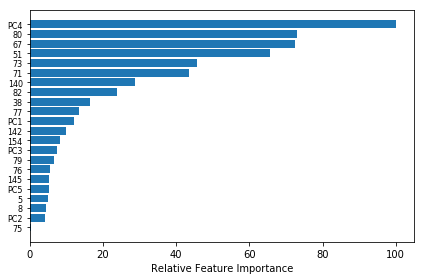

In [39]:
logreg = LogisticRegression(random_state=0)

logreg.fit(X_train,y_train)

yhat= logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, yhat)

print("RESULTS FOR LOGISTIC REGRESSION \n")

print(cnf_matrix)


print(" LR Accuracy:",metrics.accuracy_score(y_test, yhat))
print("LR Precision:",metrics.precision_score(y_test, yhat))
print("LR Recall:",metrics.recall_score(y_test, yhat))


feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5


featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.show()

##Large number of misclassifications

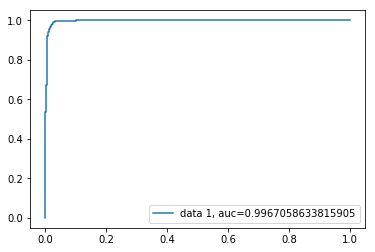

In [40]:

##Create an ROC curve. ROC score is high 0.99. Seems classifer is good.

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Create K-NN model. With Euclidean distance and 5 neighbours.


In [42]:


knn = KNeighborsClassifier(n_neighbors=5)

#Fit
knn.fit(X_train,y_train)

#Predict

knnpredict = knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, knnpredict)


print("RESULTS FOR KNN K=5 \n")
print(cnf_matrix)


print(" KNN #3 Accuracy:",metrics.accuracy_score(y_test, knnpredict))
print("KNN #3 Precision:",metrics.precision_score(y_test, knnpredict))
print("KNN #3 Recall:",metrics.recall_score(y_test, knnpredict))

##Very good accuracy


RESULTS FOR KNN K=5 

[[12036    27]
 [    4 12194]]
 KNN #3 Accuracy: 0.9987222290919583
KNN #3 Precision: 0.997790688159725
KNN #3 Recall: 0.9996720773897361


## Neural Network with 2 layers with 5 Neurons. 1000 iterations of backprop

In [43]:

mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000) #two layers of 5 neurons, 1000 of backprop
mlp.fit(X_train, y_train.values.ravel()) #train the algo

predictions = mlp.predict(X_test) #make predictions on the xtest set

print(confusion_matrix(y_test,predictions)) #results are good
print(classification_report(y_test,predictions))

[[12044    19]
 [    6 12192]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12063
           1       1.00      1.00      1.00     12198

    accuracy                           1.00     24261
   macro avg       1.00      1.00      1.00     24261
weighted avg       1.00      1.00      1.00     24261



## SVM with RBF kernel, gamma = 1/n, and relatively low Cost


In [46]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',gamma='auto',C=1)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[12035    28]
 [   12 12186]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12063
           1       1.00      1.00      1.00     12198

    accuracy                           1.00     24261
   macro avg       1.00      1.00      1.00     24261
weighted avg       1.00      1.00      1.00     24261



In [47]:
''' PRE-PROCESSING (INDIVIDUAL 4) '''
''' Cosmin Stanciu '''


' Cosmin Stanciu '

In [ ]:
''' PRE-PROCESSING (INDIVIDUAL 5) '''
''' Mike Jun Ming'''
